# <font color='blue'>Assessment for CASA0002 - Urban Simulation</font>

Deadline: <font color='red'>3rd May 11 am</font>

Word Limit: <font color='red'>3,000 words</font>

Author: Junqi Hu

---

## Introduction

The following assessment is designed to assess your understanding of the different urban modelling 
methodologies introduced in the course, and their integration. The questions are based on the 
coursework developed during the course and posted in Moodle. You should be able to work through 
the assessment using the codes provided. Carefully explain and illustrate your analysis with 
appropriate diagrams. The assessment should not exceed 3000 words in total. <font color='red'>(References, numerical 
tables and data plots do not count towards the total number of words.)</font>

The assessment will guide you to critically investigate the resilience of the London’s underground as a 
network and the methodological limitations. You will do this in two ways. In the first part, you will 
only take into consideration the infrastructural network, where stations are connected through only 
one link, regardless of the number of lines connecting the stations. In the second part, you will 
consider the commuting flows, and discuss the impact of the analysis on the number of people moving 
from one part of the city to another. Then, you will recompute the flows using spatial interaction 
models according to different scenarios described below and discuss the vulnerability of the network 
under these new scenarios.

----

## Part 1: London's underground resilience

### I. <font color='red'>Topological</font> network

In this part, you will evaluate the resilience of the London’s underground through the removal of 
stations that can potentially make the underground vulnerable. Through the procedure outlined below 
you will investigate which are the stations that are most critical for the functioning of the 
underground, and which methodology is more appropriate to finding these stations.

#### I.1. <font color='red'>Centrality measures</font>

Select <u><font color='red'>3 centrality measures</font></u> to characterise nodes, aiming at identifying <font color='red'>the most important nodes</font> in this particular network. In addition to giving their <font color='red'>definitions</font>, explain what do the measures mean into <font color='red'>the context of the underground</font>, and why they will allow you to find the stations that are most crucial 
for the functioning of the underground. Compute the measures for your nodes in the network, and give the results in <font color='red'>a table</font> for <font color='red'>the first 10 ranked nodes</font> for each of the 3 measures. (9 marks, 3 per measure)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [3]:
G=nx.read_graphml('data/london.graph.xml')

In [4]:
type(G)

networkx.classes.graph.Graph

In [5]:
print(nx.info(G))

Graph with 401 nodes and 467 edges


In [6]:
# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': '(519316.5590174915, 186389.32981656672)'})

In [7]:
#since coords tuples are stored as string, need to convert them back to tuples using eval()
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])

# To check node attributes:
list(G.nodes(data = True))[0]

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})

In [8]:
# To check edges attributes:
list(G.edges(data = True))[0]

('Wembley Park',
 'Kingsbury',
 {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})

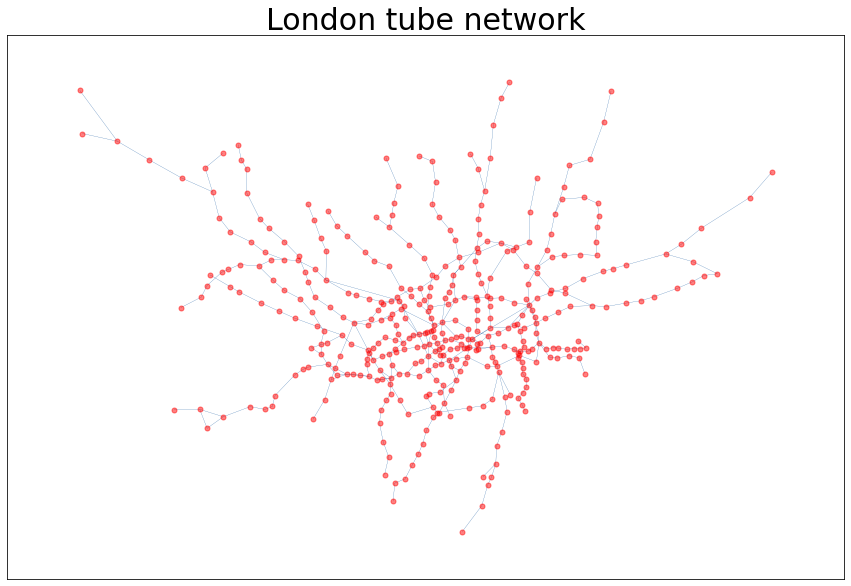

In [9]:
# Let's plot the tube network! 

# We can plot the tube network with the names of the stations as labels
fig, ax = plt.subplots(figsize=(15,10))

#node_labels = nx.get_edge_attributes(G, 'station_1_')

pos = nx.get_node_attributes(G, 'coords')

nx.draw_networkx_nodes(G,pos,node_size=25,node_color='r',alpha=0.5)
nx.draw_networkx_edges(G,pos,arrows=False,width=0.2,edge_color='#004C99',alpha=1)
#nx.draw_networkx_labels(G,pos, node_labels, font_size=10, font_color='black')

plt.title("London tube network",fontsize=30)
plt.axis("on")
plt.show()

In [10]:
#We can print the dataframe from the shapefile to check the data
df = nx.to_pandas_edgelist(G)
df[0:10]

,source,target,line_name,flows,length
0,Wembley Park,Kingsbury,Jubilee,12356,2916.771558
1,Wembley Park,Neasden,Jubilee,6744,2353.165938
2,Wembley Park,Preston Road,Metropolitan,36601,1419.735166
3,Wembley Park,Finchley Road,Metropolitan,55216,7266.373927
4,Kingsbury,Queensbury,Jubilee,9419,1245.995234
5,Queensbury,Canons Park,Jubilee,6385,1693.307343
6,Canons Park,Stanmore,Jubilee,3624,1419.669476
7,Stratford,West Ham,Jubilee,91801,1673.509515
8,Stratford,Mile End,Central,12010,2805.001392
9,Stratford,Leyton,Central,56082,2131.342926


- #### Degree Centrality on nodes

In [11]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)

In [12]:
print(deg_london)

{'Wembley Park': 0.01, 'Kingsbury': 0.005, 'Queensbury': 0.005, 'Canons Park': 0.005, 'Stanmore': 0.0025, 'Stratford': 0.0225, 'West Ham': 0.015, 'Canning Town': 0.015, 'North Greenwich': 0.005, 'Canary Wharf': 0.01, 'Canada Water': 0.01, 'Bermondsey': 0.005, 'London Bridge': 0.01, 'Southwark': 0.005, 'Waterloo': 0.015, 'Westminster': 0.01, 'Green Park': 0.015, 'Bond Street': 0.01, 'Baker Street': 0.0175, "St. John's Wood": 0.005, 'Swiss Cottage': 0.005, 'Finchley Road': 0.01, 'Neasden': 0.005, 'Dollis Hill': 0.005, 'Willesden Green': 0.005, 'Kilburn': 0.005, 'West Hampstead': 0.01, 'West Acton': 0.005, 'Ealing Broadway': 0.005, 'North Acton': 0.0075, 'West Ruislip': 0.0025, 'Ruislip Gardens': 0.005, 'South Ruislip': 0.005, 'Northolt': 0.005, 'Greenford': 0.005, 'Perivale': 0.005, 'Hanger Lane': 0.005, 'East Acton': 0.005, 'White City': 0.005, "Shepherd's Bush": 0.01, 'Holland Park': 0.005, 'Notting Hill Gate': 0.01, 'Queensway': 0.005, 'Lancaster Gate': 0.005, 'Marble Arch': 0.005, 'O

In [13]:
#set node attribution from a given dictionary of values
nx.set_node_attributes(G,dict(deg_london),'degree_topo')

In [14]:
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['degree_topo'] = pd.Series(nx.get_node_attributes(G, 'degree_topo'))

#sort the first 10 ranked nodes
df_sorted = df.sort_values(["degree_topo"], ascending=False)
df_sorted[0:10]

,degree_topo
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


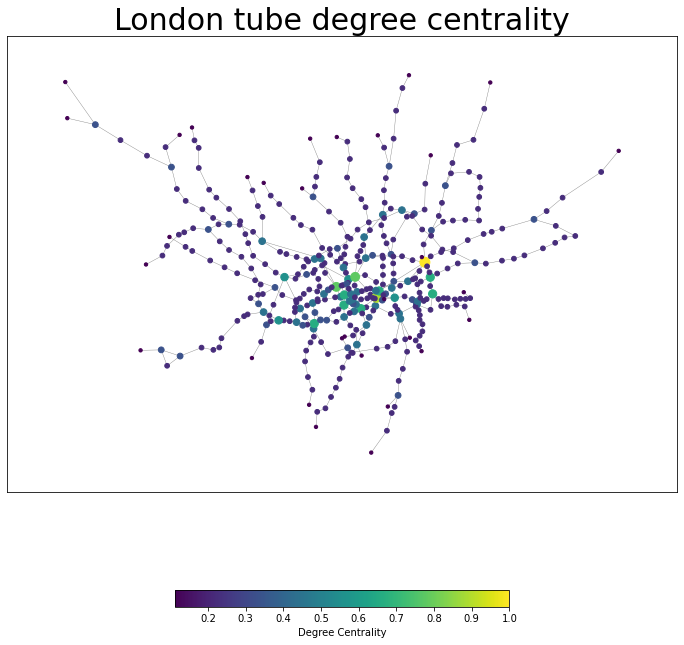

In [15]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree_topo']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree_topo']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree_topo']/(max(degree_values)))*100 for i in G.nodes(data=True)]

# Plot graph

pos=nx.get_node_attributes(G, 'coords')

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube degree centrality",fontsize=30)
plt.show()

- #### Topological Betweenness Centrality on nodes

In [16]:
#Let us compute the betweenness centrality for the network, without using weights:
bet_london_topo=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_topo,'betweenness_topo')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['betweenness_topo'] = pd.Series(nx.get_node_attributes(G, 'betweenness_topo'))

df_sorted = df.sort_values(["betweenness_topo"], ascending=False)
df_sorted[0:10]

,betweenness_topo
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


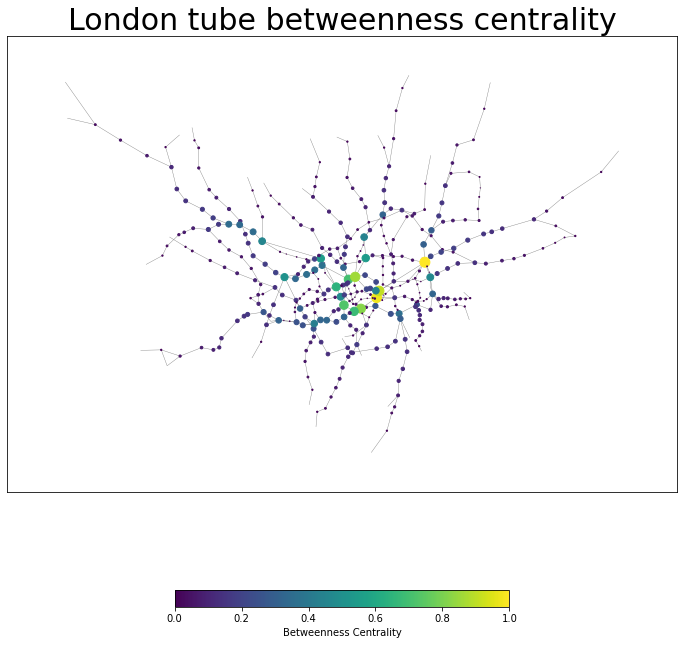

In [17]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_topo']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_topo']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_topo']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube betweenness centrality",fontsize=30)
plt.show()

- #### Topological Closeness Centrality on nodes

In [18]:
clos_topo=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_topo,'closeness_topo')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['closeness_topo'] = pd.Series(nx.get_node_attributes(G, 'closeness_topo'))

df_sorted = df.sort_values(["closeness_topo"], ascending=False)
df_sorted[0:10]

,closeness_topo
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


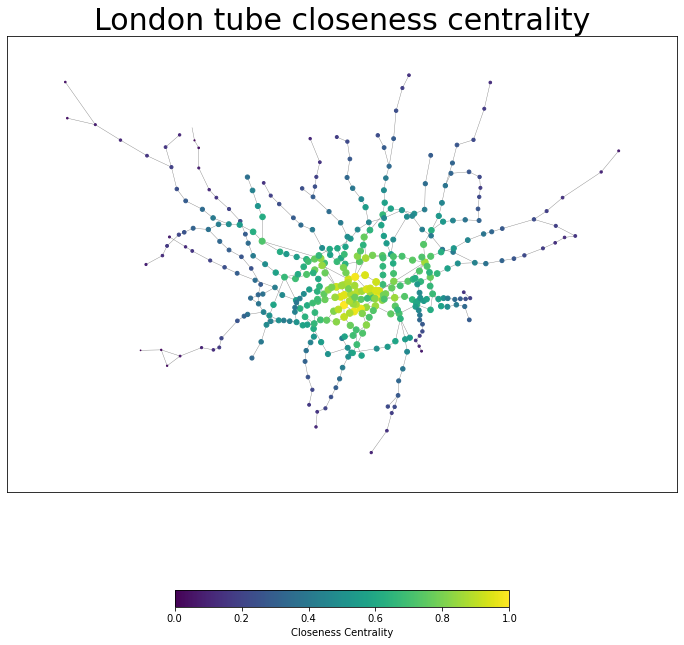

In [19]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_topo']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_topo']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_topo']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube closeness centrality",fontsize=30)
plt.show()

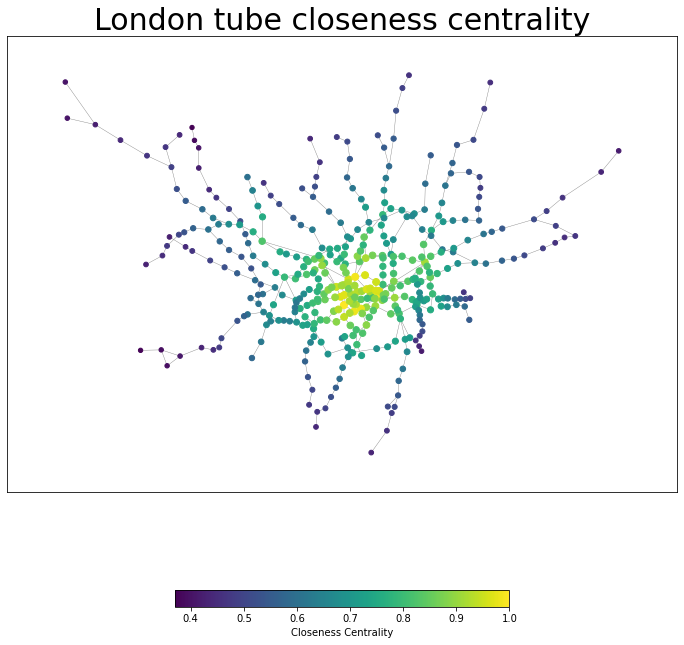

In [20]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_topo']) for i in G.nodes(data=True)]

closs_t_color=[i[1]['closeness_topo']/max(clos_t_val) for i in G.nodes(data=True)]
closs_t_size=[i[1]['closeness_topo']/max(clos_t_val)*50 for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube closeness centrality",fontsize=30)
plt.show()

- #### Topological Eigenvector Centrality on nodes

In [21]:
### Topological eigenvector centrality:

#Let us compute the igenvector centrality for the network, without using weights:
eig_london_t=nx.eigenvector_centrality(G,max_iter=1000)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,eig_london_t,'eigenvector_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
#df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['eigenvector_t'] = pd.Series(nx.get_node_attributes(G, 'eigenvector_t'))

df_sorted = df.sort_values(["eigenvector_t"], ascending=False)
df_sorted[0:10]

,eigenvector_t
Bank and Monument,0.383427
Liverpool Street,0.328824
Stratford,0.269179
Waterloo,0.249731
Moorgate,0.215137
Green Park,0.197630
Oxford Circus,0.184094
Tower Hill,0.171676
Westminster,0.168610
Shadwell,0.159090


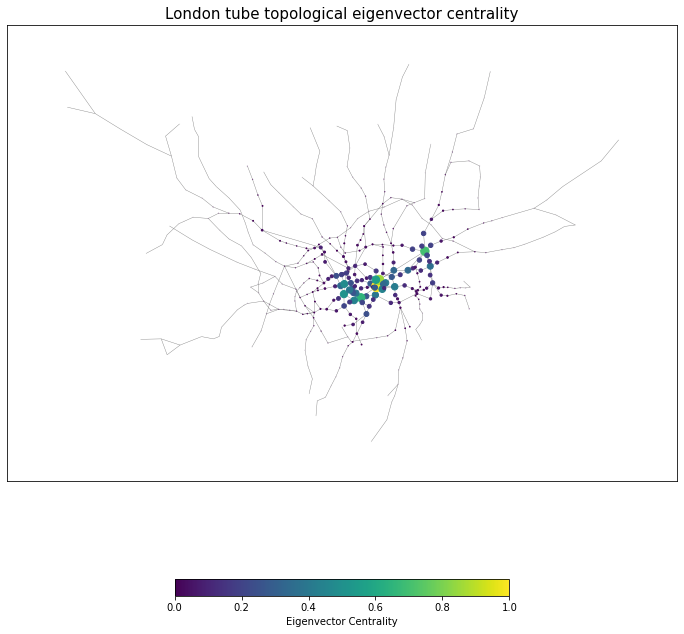

In [22]:
# Lets set colour and size of nodes according to eigenvector values
eigenvector_t_values=[(i[1]['eigenvector_t']) for i in G.nodes(data=True)]

eig_t_color=[(i[1]['eigenvector_t']/max(eigenvector_t_values)) for i in G.nodes(data=True)]
eig_t_size=[(i[1]['eigenvector_t']/max(eigenvector_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= eig_t_color, node_size= eig_t_size)

plt.colorbar(nod,label="Eigenvector Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube topological eigenvector centrality",fontsize=15)
plt.show()

#### I.2. <font color='red'>Impact measures</font>

Find 2 different measures to <u><font color='red'>evaluate the impact of the node removal on the network</font></u>. These are <u><font color='red'>global measures</font></u> referring to the whole network and not to particular nodes or links. Explain whether these 
two measures to evaluate the impact are specific to the London underground, or whether they would also be useful to evaluate the resilience of any other network. (10 marks, 5 per measure)

- average_shortest_path_length

- average_node_connectivity

- global_efiiciency

#### I.3. <font color='red'>Node removal</font>

For each of the centrality measures selected in 1.- remove at least 10 nodes following two different 
strategies. A) <u><font color='red'>non-sequential</foot></u> removal: using your table in 1.- remove 1 node at a time following the 
rank in the table, i.e. from the most important one to the 10th most important one. After each removal, 
evaluate the impact of the removal using your two measures in 2.-, and proceed until you have 
removed at least 10 nodes. B) <u><font color='red'>sequential</foot></u>: remove the highest ranked node and evaluate the impact 
using the 2 measures. After removal, re-compute the centrality measure. Remove the highest ranked 
node in the new network and evaluate the impact. Continue until removing at least ten nodes. Report 
the results of the 2 strategies in one plot, and critically discuss the following: which centrality measure 
reflects better the importance of a station for the functioning of the underground, which strategy is 
more effective at studying resilience, and which impact measure is better at assessing the damage 
after node removal.

## A) non-sequential removal

- betweenness_t centrality nodes removal

In [23]:
G1=G.copy()

bet_london_topo_1=nx.betweenness_centrality(G1, normalized=False)

nx.set_node_attributes(G1,bet_london_topo_1,'betweenness_topo')

# To ataframe using the nodes as the index
df_bet_1 = pd.DataFrame(index=G1.nodes())

df_bet_1['betweenness_topo'] = pd.Series(nx.get_node_attributes(G1, 'betweenness_topo'))

df_sorted_bet_1 = df_bet_1.sort_values(["betweenness_topo"], ascending=False)
df_sorted_bet_1[0:10]

,betweenness_topo
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [24]:
bet_ave_clu=[]
bet_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G1)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G1)} ')

print(nx.info(G1))
bet_ave_clu.append(nx.average_clustering(G1))
bet_glo_eff.append(nx.global_efficiency(G1))


for i in range(10):
    
    print('------------------------------------------------------')
    print(f'{i+1} time node removal')
    
    betweenness_t_values=[(i[1]['betweenness_topo']) for i in G1.nodes(data=True)]
    
    maxbets=[n for n in G1.nodes() if G1.nodes[n]['betweenness_topo'] == max(betweenness_t_values)]
    
    print(f'remove node: {maxbets}')
    
    G1.remove_nodes_from(maxbets)
    
    print(nx.info(G1))
    
    bet_ave_clu.append(nx.average_clustering(G1))
    bet_glo_eff.append(nx.global_efficiency(G1))
    
    print(f'average_clustering: {nx.average_clustering(G1)} ')
    print(f'global_efficiency: {nx.global_efficiency(G1)} ')

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
Graph with 401 nodes and 467 edges
------------------------------------------------------
1 time node removal
remove node: ['Stratford']
Graph with 400 nodes and 458 edges
average_clustering: 0.030625000000000003 
global_efficiency: 0.08891736066510689 
------------------------------------------------------
2 time node removal
remove node: ['Bank and Monument']
Graph with 399 nodes and 450 edges
average_clustering: 0.030027449576321755 
global_efficiency: 0.08586164448742485 
------------------------------------------------------
3 time node removal
remove node: ['Liverpool Street']
Graph with 398 nodes and 446 edges
average_clustering: 0.030102895429528594 
global_efficiency: 0.08496349266423939 
------------------------------------------------------
4 time node removal
remove node: ["King's Cross St. Pancras"]
Graph with 397 nodes and 439 edges
average_clustering: 0.03034664

In [25]:
bet_ave_clu

[0.030382377389858693,
 0.030625000000000003,
 0.030027449576321755,
 0.030102895429528594,
 0.03034664747511095,
 0.02932900432900433,
 0.028306208559373113,
 0.024993956973652406,
 0.025057554828547195,
 0.021598639455782314,
 0.0216538789428815]

In [26]:
bet_glo_eff

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.08496349266423939,
 0.07849775440713821,
 0.07594226578366223,
 0.07415154167648695,
 0.06820564659789057,
 0.06765950327361094,
 0.064700058053009,
 0.06313903700825897]

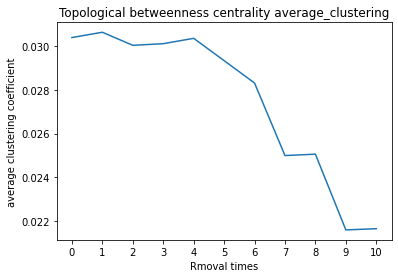

In [27]:
plt.plot(bet_ave_clu)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average clustering coefficient')
plt.title('Topological betweenness centrality average_clustering')
plt.show()

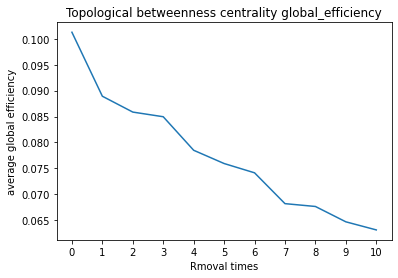

In [28]:
plt.plot(bet_glo_eff)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average global efficiency')
plt.title('Topological betweenness centrality global_efficiency')
plt.show()

- closeness_t centrality nodes removal

In [29]:
G2=G.copy()

clos__london_topo_1=nx.closeness_centrality(G2)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G2,clos__london_topo_1,'closeness_topo')

# To ataframe using the nodes as the index
df_clo_1 = pd.DataFrame(index=G2.nodes())

df_clo_1 ['closeness_topo'] = pd.Series(nx.get_node_attributes(G2, 'closeness_topo'))

df_sorted_clo_1 = df_clo_1 .sort_values(["closeness_topo"], ascending=False)
df_sorted_clo_1[0:10]

,closeness_topo
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


In [30]:
clo_ave_clu=[]
clo_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G2)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G2)} ')

print(nx.info(G2))
clo_ave_clu.append(nx.average_clustering(G2))
clo_glo_eff.append(nx.global_efficiency(G2))

for i in range(10):
    
    print('------------------------------------------------------')
    print(f'{i+1} time node removal')
    
    closeness_t_values=[(i[1]['closeness_topo']) for i in G2.nodes(data=True)]
    
    maxclos=[n for n in G2.nodes() if G2.nodes[n]['closeness_topo'] == max(closeness_t_values)]
    
    print(f'remove node: {maxclos}')
    
    G2.remove_nodes_from(maxclos)
    
    print(nx.info(G2))
    
    clo_ave_clu.append(nx.average_clustering(G2))
    clo_glo_eff.append(nx.global_efficiency(G2))
    
    print(f'average_clustering: {nx.average_clustering(G2)} ')
    print(f'global_efficiency: {nx.global_efficiency(G2)} ')

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
Graph with 401 nodes and 467 edges
------------------------------------------------------
1 time node removal
remove node: ['Green Park']
Graph with 400 nodes and 461 edges
average_clustering: 0.02979166666666667 
global_efficiency: 0.09918991960788402 
------------------------------------------------------
2 time node removal
remove node: ['Bank and Monument']
Graph with 399 nodes and 453 edges
average_clustering: 0.02927556987707364 
global_efficiency: 0.09487232544791133 
------------------------------------------------------
3 time node removal
remove node: ["King's Cross St. Pancras"]
Graph with 398 nodes and 446 edges
average_clustering: 0.02951663077291218 
global_efficiency: 0.08793385149140875 
------------------------------------------------------
4 time node removal
remove node: ['Westminster']
Graph with 397 nodes and 443 edges
average_clustering: 0.028079644956219

In [31]:
clo_ave_clu

[0.030382377389858693,
 0.02979166666666667,
 0.02927556987707364,
 0.02951663077291218,
 0.028079644956219268,
 0.028150553150553155,
 0.02990958408679928,
 0.030033840947546533,
 0.030187074829931975,
 0.030264279624893437,
 0.030341880341880345]

In [32]:
clo_glo_eff

[0.1012561935972123,
 0.09918991960788402,
 0.09487232544791133,
 0.08793385149140875,
 0.08737164566976727,
 0.08485943799789313,
 0.08278135073141742,
 0.08258086417012774,
 0.08262233108950982,
 0.08166991436767818,
 0.08129480948420958]

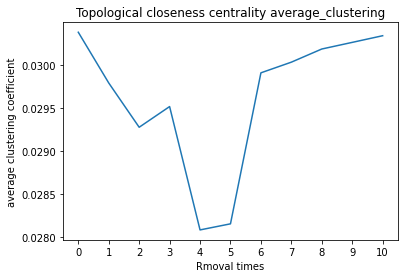

In [33]:
plt.plot(clo_ave_clu)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average clustering coefficient')
plt.title('Topological closeness centrality average_clustering')
plt.show()

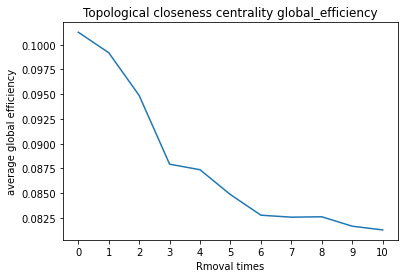

In [34]:
plt.plot(clo_glo_eff)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average global efficiency')
plt.title('Topological closeness centrality global_efficiency')
plt.show()

- eigenvector_t centrality nodes removal

In [35]:
G3=G.copy()

eig_london_topo_1=nx.eigenvector_centrality(G3,max_iter=1000)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G3,eig_london_topo_1,'eigenvector_topo')

# To ataframe using the nodes as the index
df_eig_1 = pd.DataFrame(index=G3.nodes())

df_eig_1['eigenvector_topo'] = pd.Series(nx.get_node_attributes(G3, 'eigenvector_topo'))

df_sorted_eig_1 = df_eig_1.sort_values(["eigenvector_topo"], ascending=False)
df_sorted_eig_1[0:10]

,eigenvector_topo
Bank and Monument,0.383427
Liverpool Street,0.328824
Stratford,0.269179
Waterloo,0.249731
Moorgate,0.215137
Green Park,0.197630
Oxford Circus,0.184094
Tower Hill,0.171676
Westminster,0.168610
Shadwell,0.159090


In [36]:
eig_ave_clu=[]
eig_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G3)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G3)} ')

print(nx.info(G3))

eig_ave_clu.append(nx.average_clustering(G3))
eig_glo_eff.append(nx.global_efficiency(G3))

for i in range(10):
    
    print('------------------------------------------------------')
    print(f'{i+1} time node removal')
    
    eigenvector_t_values=[(i[1]['eigenvector_topo']) for i in G3.nodes(data=True)]
    
    maxeigs=[n for n in G3.nodes() if G3.nodes[n]['eigenvector_topo'] == max(eigenvector_t_values)]
    
    print(f'remove node: {maxeigs}')
    
    G3.remove_nodes_from(maxeigs)
    
    print(nx.info(G3))
    
    eig_ave_clu.append(nx.average_clustering(G3))
    eig_glo_eff.append(nx.global_efficiency(G3))
    
    print(f'average_clustering: {nx.average_clustering(G3)} ')
    print(f'global_efficiency: {nx.global_efficiency(G3)} ')

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
Graph with 401 nodes and 467 edges
------------------------------------------------------
1 time node removal
remove node: ['Bank and Monument']
Graph with 400 nodes and 459 edges
average_clustering: 0.029869047619047625 
global_efficiency: 0.09673475608480861 
------------------------------------------------------
2 time node removal
remove node: ['Liverpool Street']
Graph with 399 nodes and 454 edges
average_clustering: 0.029943907387516414 
global_efficiency: 0.09466837185209931 
------------------------------------------------------
3 time node removal
remove node: ['Stratford']
Graph with 398 nodes and 446 edges
average_clustering: 0.030102895429528594 
global_efficiency: 0.08496349266423939 
------------------------------------------------------
4 time node removal
remove node: ['Waterloo']
Graph with 397 nodes and 441 edges
average_clustering: 0.029087201631282235 
glob

In [37]:
eig_ave_clu

[0.030382377389858693,
 0.029869047619047625,
 0.029943907387516414,
 0.030102895429528594,
 0.029087201631282235,
 0.02916065416065416,
 0.028137432188065102,
 0.029900894367899444,
 0.029976978068581125,
 0.03005344995140914,
 0.030130312994763125]

In [38]:
eig_glo_eff

[0.1012561935972123,
 0.09673475608480861,
 0.09466837185209931,
 0.08496349266423939,
 0.08279744276719272,
 0.08274921868611891,
 0.08095263922699573,
 0.08010365033688667,
 0.07974127087938142,
 0.07910029077936687,
 0.07757948425579476]

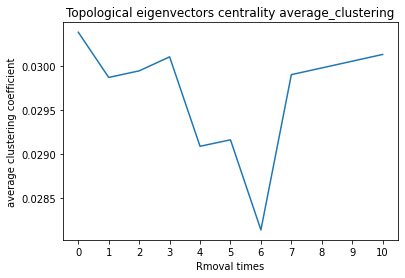

In [39]:
plt.plot(eig_ave_clu)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average clustering coefficient')
plt.title('Topological eigenvectors centrality average_clustering')
plt.show()

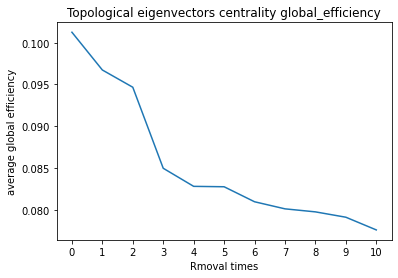

In [40]:
plt.plot(eig_glo_eff)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average global efficiency')
plt.title('Topological eigenvectors centrality global_efficiency')
plt.show()

- degree_t centrality nodes removal

In [41]:
G4=G.copy()

deg_london_topo_1 =nx.degree_centrality(G4)

#set node attribution from a given dictionary of values
nx.set_node_attributes(G4,dict(deg_london_topo_1),'degree_topo')

# To dataframe using the nodes as the index
df_deg_1 = pd.DataFrame(index=G4.nodes())

df_deg_1['degree_topo'] = pd.Series(nx.get_node_attributes(G4, 'degree_topo'))

#sort the first 10 ranked nodes
df_sorted_deg_1 = df_deg_1.sort_values(["degree_topo"], ascending=False)
df_sorted_deg_1[0:10]

,degree_topo
Stratford,0.0225
Bank and Monument,0.0200
King's Cross St. Pancras,0.0175
Baker Street,0.0175
Earl's Court,0.0150
Oxford Circus,0.0150
Liverpool Street,0.0150
Waterloo,0.0150
Green Park,0.0150
Canning Town,0.0150


In [42]:
deg_ave_clu=[]
deg_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G4)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G4)} ')

print(nx.info(G4))

deg_ave_clu.append(nx.average_clustering(G4))
deg_glo_eff.append(nx.global_efficiency(G4))

try: 
    for i in range(10):

        print('------------------------------------------------------')
        print(f'{i+1} time node removal')

        degree_t_values=[(i[1]['degree_topo']) for i in G4.nodes(data=True)]

        maxdegs=[n for n in G4.nodes() if G4.nodes[n]['degree_topo'] == max(degree_t_values)]

        print(f'remove node: {maxdegs}')

        G4.remove_nodes_from(maxdegs)

        print(nx.info(G4))

        deg_ave_clu.append(nx.average_clustering(G4))
        deg_glo_eff.append(nx.global_efficiency(G4))

        print(f'average_clustering: {nx.average_clustering(G4)} ')
        print(f'global_efficiency: {nx.global_efficiency(G4)} ')
except ZeroDivisionError:
    pass

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
Graph with 401 nodes and 467 edges
------------------------------------------------------
1 time node removal
remove node: ['Stratford']
Graph with 400 nodes and 458 edges
average_clustering: 0.030625000000000003 
global_efficiency: 0.08891736066510689 
------------------------------------------------------
2 time node removal
remove node: ['Bank and Monument']
Graph with 399 nodes and 450 edges
average_clustering: 0.030027449576321755 
global_efficiency: 0.08586164448742485 
------------------------------------------------------
3 time node removal
remove node: ['Baker Street', "King's Cross St. Pancras"]
Graph with 397 nodes and 436 edges
average_clustering: 0.027287993282955506 
global_efficiency: 0.07570039409751211 
------------------------------------------------------
4 time node removal
remove node: ['West Ham', 'Canning Town', 'Waterloo', 'Green Park', 'Oxford Circus'

In [43]:
deg_ave_clu

[0.030382377389858693,
 0.030625000000000003,
 0.030027449576321755,
 0.027287993282955506,
 0.016923076923076923,
 0.010362694300518135,
 0.004708097928436911,
 0.0,
 0.0]

In [44]:
deg_glo_eff

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.07570039409751211,
 0.062061403668075166,
 0.04309736951968584,
 0.011132677234898294,
 0.007040367194524699,
 0.0]

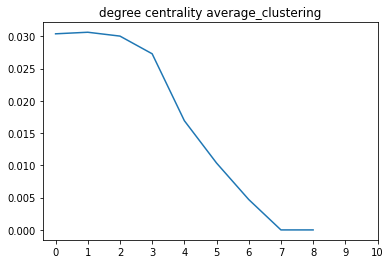

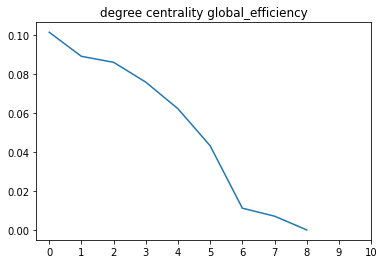

In [45]:
plt.plot(deg_ave_clu)
plt.xticks(np.arange(0,11))
plt.title('degree centrality average_clustering')
plt.show()

plt.plot(deg_glo_eff)
plt.xticks(np.arange(0,11))
plt.title('degree centrality global_efficiency')
plt.show()

## B) sequential removal

- betweenness_t centrality nodes removal

In [46]:
G5=G.copy()

In [47]:
bet_ave_clu=[]
bet_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G5)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G5)} ')
print(nx.info(G5))

bet_ave_clu.append(nx.average_clustering(G5))
bet_glo_eff.append(nx.global_efficiency(G5))

for i in range(10):
    
    print('------------------------------------------------------')
    print(f'{i+1} time node removal')
    
    bet_london_topo_2=nx.betweenness_centrality(G5, normalized=False)
    
    nx.set_node_attributes(G5,bet_london_topo_2,'betweenness_topo')
    
    betweenness_t_values=[(i[1]['betweenness_topo']) for i in G5.nodes(data=True)]
    
    maxbets=[n for n in G5.nodes() if G5.nodes[n]['betweenness_topo'] == max(betweenness_t_values)]
    
    print(f'remove node: {maxbets}')
    
    G5.remove_nodes_from(maxbets)
    
    print(nx.info(G5))
    
    bet_ave_clu.append(nx.average_clustering(G5))
    bet_glo_eff.append(nx.global_efficiency(G5))
    
    print(f'average_clustering: {nx.average_clustering(G5)} ')        
    print(f'global_efficiency: {nx.global_efficiency(G5)} ')
          

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
Graph with 401 nodes and 467 edges
------------------------------------------------------
1 time node removal
remove node: ['Stratford']
Graph with 400 nodes and 458 edges
average_clustering: 0.030625000000000003 
global_efficiency: 0.08891736066510689 
------------------------------------------------------
2 time node removal
remove node: ["King's Cross St. Pancras"]
Graph with 399 nodes and 451 edges
average_clustering: 0.030868838763575608 
global_efficiency: 0.08460293133575152 
------------------------------------------------------
3 time node removal
remove node: ['Waterloo']
Graph with 398 nodes and 445 edges
average_clustering: 0.02997128499641063 
global_efficiency: 0.08182895253292936 
------------------------------------------------------
4 time node removal
remove node: ['Bank and Monument']
Graph with 397 nodes and 438 edges
average_clustering: 0.02925512774379273

In [48]:
bet_ave_clu

[0.030382377389858693,
 0.030625000000000003,
 0.030868838763575608,
 0.02997128499641063,
 0.02925512774379273,
 0.02932900432900433,
 0.029403254972875225,
 0.022625090645395213,
 0.022682660850599782,
 0.01933916423712342,
 0.016283034953111678]

In [49]:
bet_glo_eff

[0.1012561935972123,
 0.08891736066510689,
 0.08460293133575152,
 0.08182895253292936,
 0.07767794342812263,
 0.07283234083472483,
 0.053210203984026455,
 0.05165629952389727,
 0.0458442134055722,
 0.04163076968121037,
 0.0381637040943985]

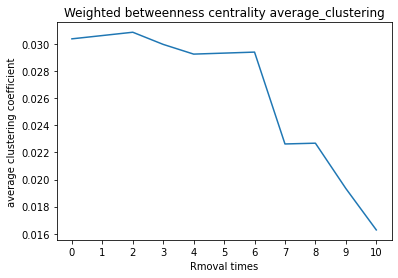

In [50]:
plt.plot(bet_ave_clu)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average clustering coefficient')
plt.title('Weighted betweenness centrality average_clustering')
plt.show()

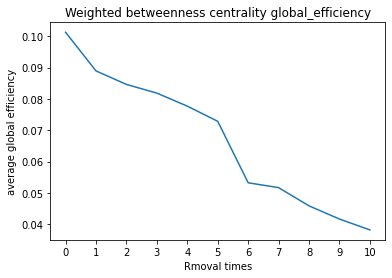

In [51]:
plt.plot(bet_glo_eff)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average global efficiency')
plt.title('Weighted betweenness centrality global_efficiency')
plt.show()

- closeness_t centrality nodes removal

In [52]:
G6=G.copy()

clo_ave_clu=[]
clo_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G6)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G6)} ')
clo_ave_clu.append(nx.average_clustering(G6))
clo_glo_eff.append(nx.global_efficiency(G6))

for i in range(10):
    
    print('------------------------------------------------------')
    print(f'{i+1} time node removal')
    
    clo_london_topo_2=nx.closeness_centrality(G6)
    
    nx.set_node_attributes(G6,clo_london_topo_2,'closeness_topo')
    
    closeness_t_values=[(i[1]['closeness_topo']) for i in G6.nodes(data=True)]
    
    maxclos=[n for n in G6.nodes() if G6.nodes[n]['closeness_topo'] == max(closeness_t_values)]
    
    print(f'remove node: {maxclos}')
    
    G6.remove_nodes_from(maxclos)
    
    print(nx.info(G6))
    
    clo_ave_clu.append(nx.average_clustering(G6))
    clo_glo_eff.append(nx.global_efficiency(G6))
    
    print(f'average_clustering: {nx.average_clustering(G6)} ')        
    print(f'global_efficiency: {nx.global_efficiency(G6)} ')

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
------------------------------------------------------
1 time node removal
remove node: ['Green Park']
Graph with 400 nodes and 461 edges
average_clustering: 0.02979166666666667 
global_efficiency: 0.09918991960788402 
------------------------------------------------------
2 time node removal
remove node: ["King's Cross St. Pancras"]
Graph with 399 nodes and 454 edges
average_clustering: 0.03003341687552214 
global_efficiency: 0.09443475025566316 
------------------------------------------------------
3 time node removal
remove node: ['Waterloo']
Graph with 398 nodes and 448 edges
average_clustering: 0.028715003589375454 
global_efficiency: 0.09181648060183005 
------------------------------------------------------
4 time node removal
remove node: ['Bank and Monument']
Graph with 397 nodes and 441 edges
average_clustering: 0.028079644956219268 
global_efficiency: 0.08542563066

In [53]:
clo_ave_clu

[0.030382377389858693,
 0.02979166666666667,
 0.03003341687552214,
 0.028715003589375454,
 0.028079644956219268,
 0.028150553150553155,
 0.02822182037371911,
 0.028378051728305535,
 0.021580031503695626,
 0.02163508260447036,
 0.023395445134575574]

In [54]:
clo_glo_eff

[0.1012561935972123,
 0.09918991960788402,
 0.09443475025566316,
 0.09181648060183005,
 0.08542563066911478,
 0.08054424756502003,
 0.05810104159173278,
 0.051883620553389555,
 0.05035000093626794,
 0.04439458727102797,
 0.04295771061337044]

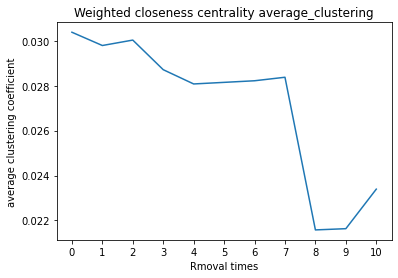

In [55]:
plt.plot(clo_ave_clu)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average clustering coefficient')
plt.title('Weighted closeness centrality average_clustering')
plt.show()

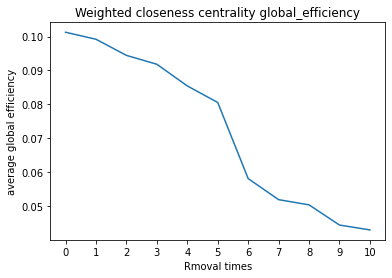

In [56]:
plt.plot(clo_glo_eff)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average global efficiency')
plt.title('Weighted closeness centrality global_efficiency')
plt.show()

- eigenvector_t centrality nodes removal

In [57]:
G7=G.copy()

eig_ave_clu=[]
eig_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G7)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G7)} ')
eig_ave_clu.append(nx.average_clustering(G7))
eig_glo_eff.append(nx.global_efficiency(G7))

for i in range(10):
    
    print('------------------------------------------------------')
    print(f'{i+1} time node removal')
    
    eig_london_topo_2=nx.eigenvector_centrality(G7,max_iter=1000)

    nx.set_node_attributes(G7,eig_london_topo_2,'eigenvector_topo')
    
    eigenvector_t_values=[(i[1]['eigenvector_topo']) for i in G7.nodes(data=True)]
    
    maxeigs=[n for n in G7.nodes() if G7.nodes[n]['eigenvector_topo'] == max(eigenvector_t_values)]
    
    print(f'remove node: {maxeigs}')
    
    G7.remove_nodes_from(maxeigs)
    
    print(nx.info(G7))
    
    eig_ave_clu.append(nx.average_clustering(G7))
    eig_glo_eff.append(nx.global_efficiency(G7))
    
    print(f'average_clustering: {nx.average_clustering(G7)} ')        
    print(f'global_efficiency: {nx.global_efficiency(G7)} ')

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
------------------------------------------------------
1 time node removal
remove node: ['Bank and Monument']
Graph with 400 nodes and 459 edges
average_clustering: 0.029869047619047625 
global_efficiency: 0.09673475608480861 
------------------------------------------------------
2 time node removal
remove node: ['Oxford Circus']
Graph with 399 nodes and 453 edges
average_clustering: 0.028857858933046907 
global_efficiency: 0.09572154971942255 
------------------------------------------------------
3 time node removal
remove node: ['Stratford']
Graph with 398 nodes and 444 edges
average_clustering: 0.029014118210098108 
global_efficiency: 0.08481338852946943 
------------------------------------------------------
4 time node removal
remove node: ["Earl's Court"]
Graph with 397 nodes and 438 edges
average_clustering: 0.022286194074607173 
global_efficiency: 0.08336866657022055

In [58]:
eig_ave_clu

[0.030382377389858693,
 0.029869047619047625,
 0.028857858933046907,
 0.029014118210098108,
 0.022286194074607173,
 0.02124819624819625,
 0.01780590717299578,
 0.018020304568527917,
 0.015097540288379981,
 0.011904761904761904,
 0.00980392156862745]

In [59]:
eig_glo_eff

[0.1012561935972123,
 0.09673475608480861,
 0.09572154971942255,
 0.08481338852946943,
 0.08336866657022055,
 0.08241157558059028,
 0.07821919060401832,
 0.07207406885198167,
 0.06689893674532071,
 0.06545820168271979,
 0.06408040345474385]

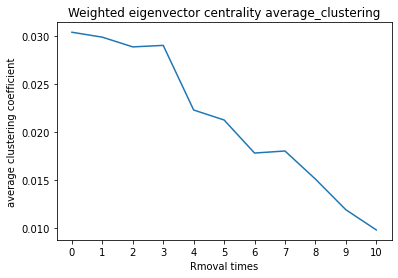

In [60]:
plt.plot(eig_ave_clu)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average clustering coefficient')
plt.title('Weighted eigenvector centrality average_clustering')
plt.show()

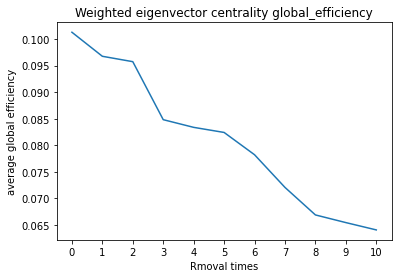

In [61]:
plt.plot(eig_glo_eff)
plt.xticks(np.arange(0,11))
plt.xlabel('Rmoval times')
plt.ylabel('average global efficiency')
plt.title('Weighted eigenvector centrality global_efficiency')
plt.show()

- degree_t centrality nodes removal

In [62]:
G8=G.copy()

deg_ave_clu=[]
deg_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G8)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G8)} ')
deg_ave_clu.append(nx.average_clustering(G8))
deg_glo_eff.append(nx.global_efficiency(G8))

try:
    for i in range(10):

        print('------------------------------------------------------')
        print(f'{i+1} time node removal')

        deg_london_topo_2 =nx.degree_centrality(G8)

        nx.set_node_attributes(G8,deg_london_topo_2,'degree_topo')

        degree_t_values=[(i[1]['degree_topo']) for i in G8.nodes(data=True)]

        maxdegs=[n for n in G8.nodes() if G8.nodes[n]['degree_topo'] == max(degree_t_values)]

        print(f'remove node: {maxdegs}')

        G8.remove_nodes_from(maxdegs)

        print(nx.info(G8))

        deg_ave_clu.append(nx.average_clustering(G8))
        deg_glo_eff.append(nx.global_efficiency(G8))

        print(f'average_clustering: {nx.average_clustering(G8)} ')        
        print(f'global_efficiency: {nx.global_efficiency(G8)} ')
except ZeroDivisionError:
    pass

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
------------------------------------------------------
1 time node removal
remove node: ['Stratford']
Graph with 400 nodes and 458 edges
average_clustering: 0.030625000000000003 
global_efficiency: 0.08891736066510689 
------------------------------------------------------
2 time node removal
remove node: ['Bank and Monument']
Graph with 399 nodes and 450 edges
average_clustering: 0.030027449576321755 
global_efficiency: 0.08586164448742485 
------------------------------------------------------
3 time node removal
remove node: ['Baker Street', "King's Cross St. Pancras"]
Graph with 397 nodes and 436 edges
average_clustering: 0.027287993282955506 
global_efficiency: 0.07570039409751211 
------------------------------------------------------
4 time node removal
remove node: ['Canning Town', 'Green Park', 'Oxford Circus', "Earl's Court"]
Graph with 393 nodes and 413 edges
averag

In [63]:
deg_ave_clu

[0.030382377389858693,
 0.030625000000000003,
 0.030027449576321755,
 0.027287993282955506,
 0.0183206106870229,
 0.013675213675213672,
 0.0045045045045045045,
 0.0,
 0.0,
 0.0]

In [64]:
deg_glo_eff

[0.1012561935972123,
 0.08891736066510689,
 0.08586164448742485,
 0.07570039409751211,
 0.0666869485473866,
 0.05472864295219614,
 0.014044126993621422,
 0.006773413410581574,
 0.0015518311607697084,
 0.0]

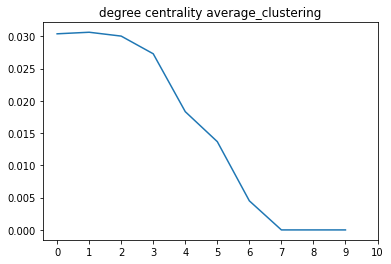

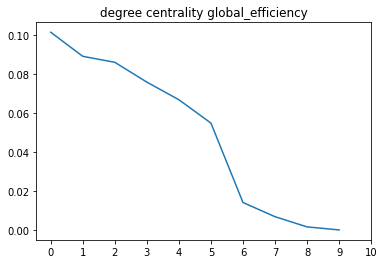

In [65]:
plt.plot(deg_ave_clu)
plt.xticks(np.arange(0,11))
plt.title('degree centrality average_clustering')
plt.show()

plt.plot(deg_glo_eff)
plt.xticks(np.arange(0,11))
plt.title('degree centrality global_efficiency')
plt.show()

### II. <font color='red'>Flows:weighted network</font>

In this section, you will include passengers into the underground, and assess whether different 
measures need to be used when <u><font color='red'>flows</font></u> are considered. The network to use in this section is the 
<u><font color='red'>weighted network</font></u> given to you in the coursework, where the flows of passengers were assigned to the 
links between stations.

#### II.1. 

Consider the centrality measure derived in I.- indicating the most relevant stations for assessing 
the vulnerability of the underground. What would you need to do to adjust this measure for a 
weighted network? Recompute the ranking of <u><font color='red'>the 10 most important nodes</font></u> according to this adjusted 
measure. Do you find the same ones as in I.1?

- #### Degree Centrality on nodes

nx.degree_centrality does not have weight parameter

- #### Weighted Betweenness Centrality on nodes

In [66]:
bet_london_w=nx.betweenness_centrality(G,weight='flows',normalized=False)

# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')

# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

,betweenness_w
West Hampstead,28401.50
Gospel Oak,21947.00
Finchley Road & Frognal,21446.00
Hampstead Heath,21372.00
Willesden Junction,19166.50
Leicester Square,17097.75
Brondesbury,16526.00
Brondesbury Park,16411.50
Kensal Rise,16299.75
Blackhorse Road,16091.75


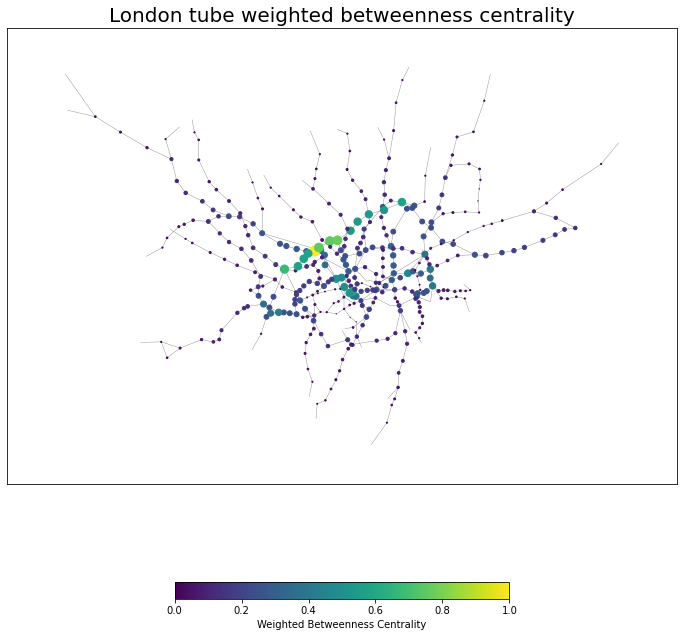

In [67]:
# Lets set colour and size of nodes according to betweenness values
betweenness_w_values=[(i[1]['betweenness_w']) for i in G.nodes(data=True)]

bet_w_color=[(i[1]['betweenness_w']/max(betweenness_w_values)) for i in G.nodes(data=True)]
bet_w_size=[(i[1]['betweenness_w']/max(betweenness_w_values))*100 for i in G.nodes(data=True)]


# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= bet_w_color,
        node_size= bet_w_size)

plt.colorbar(nod,label="Weighted Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube weighted betweenness centrality",fontsize=20)
plt.show()

- #### Weighted Closeness Centrality on nodes

In [68]:
clos_w=nx.closeness_centrality(G,distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:15]

,closeness_w
Holborn,0.000079
King's Cross St. Pancras,0.000079
Tottenham Court Road,0.000079
Oxford Circus,0.000079
Leicester Square,0.000078
Piccadilly Circus,0.000078
Charing Cross,0.000078
Chancery Lane,0.000078
Covent Garden,0.000078
Embankment,0.000078


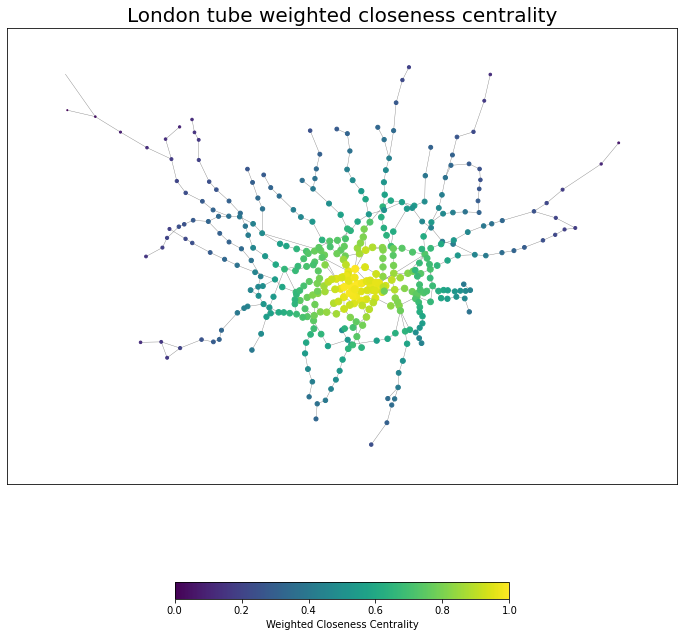

In [69]:
# Lets set color and width of nodes according to the closeness values
clos_w_val=[(i[1]['closeness_w']) for i in G.nodes(data=True)]

closs_w_color=[(i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val)) for i in G.nodes(data=True)]
closs_w_size=[((i[1]['closeness_w']-min(clos_w_val))/(max(clos_w_val)-min(clos_w_val))*50) for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_w_color,
        node_size= closs_w_size)

plt.colorbar(nod,label="Weighted Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube weighted closeness centrality",fontsize=20)
plt.show()

- #### Weighted Eigenvector Centrality on nodes

In [70]:
eig_london_w=nx.eigenvector_centrality(G,weight='flows',max_iter=1000)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,eig_london_w,'eigenvector_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['eigenvector_w'] = pd.Series(nx.get_node_attributes(G, 'eigenvector_w'))

df_sorted = df.sort_values(["eigenvector_w"], ascending=False)
df_sorted[0:10]

,eigenvector_w
Waterloo,0.527355
Westminster,0.481937
Bank and Monument,0.417409
Green Park,0.374465
Liverpool Street,0.214570
Bond Street,0.156550
Oxford Circus,0.140253
Victoria,0.132111
Moorgate,0.118185
Southwark,0.100186


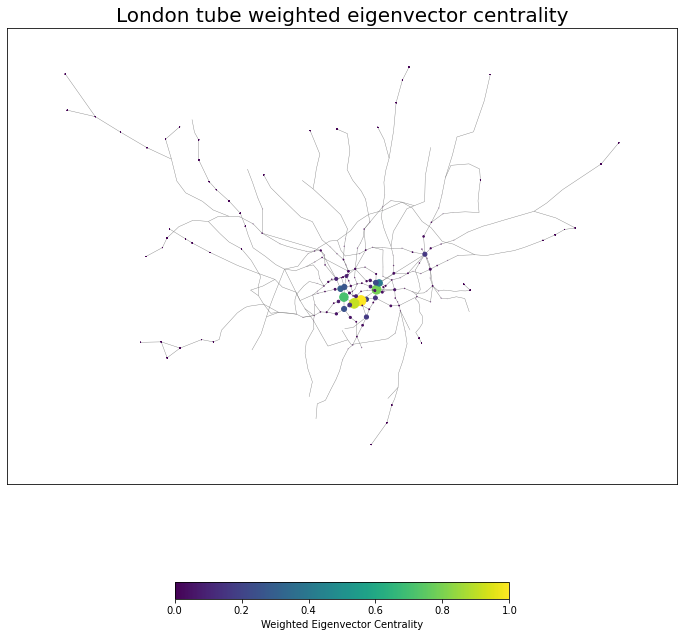

In [71]:
# Lets set colour and size of nodes according to eigenvector values
eigenvector_w_values=[(i[1]['eigenvector_w']) for i in G.nodes(data=True)]

eig_w_color=[(i[1]['eigenvector_w']/max(eigenvector_w_values)) for i in G.nodes(data=True)]
eig_w_size=[(i[1]['eigenvector_w']/max(eigenvector_w_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= eig_w_color, node_size= eig_w_size)

plt.colorbar(nod,label="Weighted Eigenvector Centrality",orientation="horizontal", shrink=0.5)
plt.axis("on")
plt.title("London tube weighted eigenvector centrality",fontsize=20)
plt.show()

In [72]:
G9=G.copy()

bet_london_topo_1=nx.betweenness_centrality(G9,weight='flows',normalized=False)

nx.set_node_attributes(G9,bet_london_topo_1,'betweenness_topo')

# To ataframe using the nodes as the index
df_bet_1 = pd.DataFrame(index=G9.nodes())

df_bet_1['betweenness_topo'] = pd.Series(nx.get_node_attributes(G9, 'betweenness_topo'))

df_sorted_bet_1 = df_bet_1.sort_values(["betweenness_topo"], ascending=False)
df_sorted_bet_1[0:10]

,betweenness_topo
West Hampstead,28401.50
Gospel Oak,21947.00
Finchley Road & Frognal,21446.00
Hampstead Heath,21372.00
Willesden Junction,19166.50
Leicester Square,17097.75
Brondesbury,16526.00
Brondesbury Park,16411.50
Kensal Rise,16299.75
Blackhorse Road,16091.75


In [73]:
bet_ave_clu=[]
bet_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G9)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G9)} ')

print(nx.info(G9))
bet_ave_clu.append(nx.average_clustering(G9))
bet_glo_eff.append(nx.global_efficiency(G9))


for i in range(10):
    
    print('------------------------------------------------------')
    print(f'{i+1} time node removal')
    
    betweenness_t_values=[(i[1]['betweenness_topo']) for i in G9.nodes(data=True)]
    
    maxbets=[n for n in G9.nodes() if G9.nodes[n]['betweenness_topo'] == max(betweenness_t_values)]
    
    print(f'remove node: {maxbets}')
    
    G9.remove_nodes_from(maxbets)
    
    print(nx.info(G9))
    
    bet_ave_clu.append(nx.average_clustering(G9))
    bet_glo_eff.append(nx.global_efficiency(G9))
    
    print(f'average_clustering: {nx.average_clustering(G9)} ')
    print(f'global_efficiency: {nx.global_efficiency(G9)} ')

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
Graph with 401 nodes and 467 edges
------------------------------------------------------
1 time node removal
remove node: ['West Hampstead']
Graph with 400 nodes and 463 edges
average_clustering: 0.030458333333333337 
global_efficiency: 0.10005038744672845 
------------------------------------------------------
2 time node removal
remove node: ['Gospel Oak']
Graph with 399 nodes and 460 edges
average_clustering: 0.030534670008354223 
global_efficiency: 0.09920006984282236 
------------------------------------------------------
3 time node removal
remove node: ['Finchley Road & Frognal']
Graph with 398 nodes and 459 edges
average_clustering: 0.030611390284757123 
global_efficiency: 0.0996871605583323 
------------------------------------------------------
4 time node removal
remove node: ['Hampstead Heath']
Graph with 397 nodes and 459 edges
average_clustering: 0.0306884970612

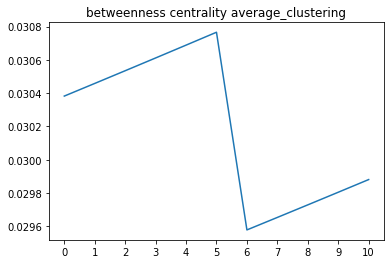

In [74]:
plt.plot(bet_ave_clu)
plt.xticks(np.arange(0,11))
plt.title('betweenness centrality average_clustering')
plt.show()

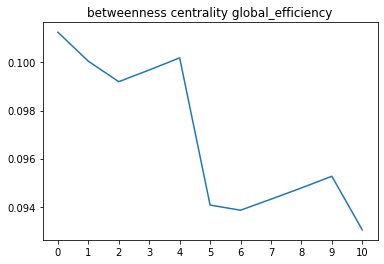

In [75]:
plt.plot(bet_glo_eff)
plt.xticks(np.arange(0,11))
plt.title('betweenness centrality global_efficiency')
plt.show()

In [76]:
G2=G.copy()

clos__london_topo_1=nx.closeness_centrality(G2,distance='length')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G2,clos__london_topo_1,'closeness_topo')

# To ataframe using the nodes as the index
df_clo_1 = pd.DataFrame(index=G2.nodes())

df_clo_1 ['closeness_topo'] = pd.Series(nx.get_node_attributes(G2, 'closeness_topo'))

df_sorted_clo_1 = df_clo_1 .sort_values(["closeness_topo"], ascending=False)
df_sorted_clo_1[0:10]

,closeness_topo
Holborn,0.000079
King's Cross St. Pancras,0.000079
Tottenham Court Road,0.000079
Oxford Circus,0.000079
Leicester Square,0.000078
Piccadilly Circus,0.000078
Charing Cross,0.000078
Chancery Lane,0.000078
Covent Garden,0.000078
Embankment,0.000078


In [77]:
clo_ave_clu=[]
clo_glo_eff=[]

print(f'average_clustering before removal: {nx.average_clustering(G2)} ')
print(f'global_efficiency before removal: {nx.global_efficiency(G2)} ')

print(nx.info(G2))
clo_ave_clu.append(nx.average_clustering(G2))
clo_glo_eff.append(nx.global_efficiency(G2))

for i in range(10):
    
    print('------------------------------------------------------')
    print(f'{i+1} time node removal')
    
    closeness_t_values=[(i[1]['closeness_topo']) for i in G2.nodes(data=True)]
    
    maxclos=[n for n in G2.nodes() if G2.nodes[n]['closeness_topo'] == max(closeness_t_values)]
    
    print(f'remove node: {maxclos}')
    
    G2.remove_nodes_from(maxclos)
    
    print(nx.info(G2))
    
    clo_ave_clu.append(nx.average_clustering(G2))
    clo_glo_eff.append(nx.global_efficiency(G2))
    
    print(f'average_clustering: {nx.average_clustering(G2)} ')
    print(f'global_efficiency: {nx.global_efficiency(G2)} ')

average_clustering before removal: 0.030382377389858693 
global_efficiency before removal: 0.1012561935972123 
Graph with 401 nodes and 467 edges
------------------------------------------------------
1 time node removal
remove node: ['Holborn']
Graph with 400 nodes and 463 edges
average_clustering: 0.030458333333333337 
global_efficiency: 0.10079320320174945 
------------------------------------------------------
2 time node removal
remove node: ["King's Cross St. Pancras"]
Graph with 399 nodes and 456 edges
average_clustering: 0.030701754385964918 
global_efficiency: 0.09614970516397503 
------------------------------------------------------
3 time node removal
remove node: ['Tottenham Court Road']
Graph with 398 nodes and 453 edges
average_clustering: 0.031365159128978234 
global_efficiency: 0.09600193496889793 
------------------------------------------------------
4 time node removal
remove node: ['Oxford Circus']
Graph with 397 nodes and 448 edges
average_clustering: 0.0301847187

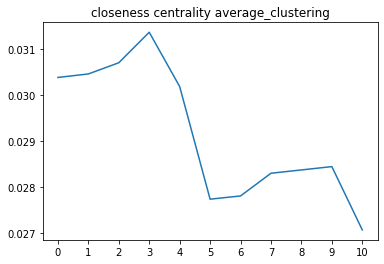

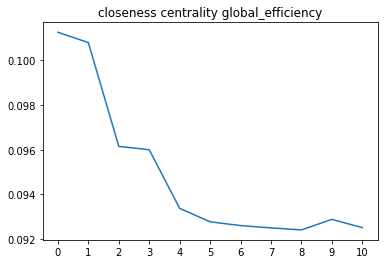

In [78]:
plt.plot(clo_ave_clu)
plt.xticks(np.arange(0,11))
plt.title('closeness centrality average_clustering')
plt.show()

plt.plot(clo_glo_eff)
plt.xticks(np.arange(0,11))
plt.title('closeness centrality global_efficiency')

plt.show()

## Part 2: Spatial Interaction models 

For this section, you will be given a“symbolic” population and the number of jobs for the stations in the underground. You will also be given the number of people that commute from one station to another, through an OD matrix.

### III.Models and calibration

#### III.2. 
Using the information of population, jobs and flows, select a spatial interaction model and calibrate the parameter beta. Make sure to justify your selection of model.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [80]:
cdata=pd.read_csv('data/london_flows.csv')
cdata.head(5)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [81]:
#the data needs to be ordered by borough code, if it's not then we will run into problems when we try to merge the 
#distance data back in later
cdata.sort_values(by=["station_origin", "station_destination"], inplace = True)

#reset the resulting index (important for later) when merging back together
cdata.reset_index(inplace=True)
cdata.drop(columns = ["index"], inplace=True)
cdata.head(5)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [82]:
#first we create a new total column which excludes intra-borough flow totals (we will set them
#to a very small number for reasons you will see later)
cdata["TotalNoIntra"] = cdata.apply(lambda x: 0 if x['station_origin'] == x['station_destination'] else x['flows'], axis=1)

#set the number to a very small number
cdata["offset"]= cdata.apply(lambda x: 0.0000000001 if x['station_origin'] == x['station_destination'] else 0, axis=1)

cdata

,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0,0.0
1,Abbey Road,Beckton,1,599,442,8510.121774,1,0.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,3,0.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0.0
...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127,0.0
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608,0.0
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6,0.0
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81,0.0


In [83]:
#we will just select the first 7 boroughs by code
to_match = ["Westminster", "Canary Wharf", "Oxford Circus", "Old Street", "King's Cross St. Pancras", "Bank and Monument", "Stratford"]

#subset the data by the 7 sample boroughs
#first the origins
cdatasub = cdata[cdata["station_origin"].isin(to_match)]
#then the destinations
cdatasub = cdatasub[cdata["station_destination"].isin(to_match)]

#now chop out the intra-borough flows
cdatasub = cdatasub[cdata["station_origin"] != cdata["station_destination"]]

#we now want to re-order so that OrigCodeNEw, DestCodeNew and TotalNoIntra are the first three columns
beg = ["station_origin", "station_destination", "TotalNoIntra"] 
cols = beg + [col for col in cdatasub.columns.tolist() if col not in beg]
#re index the columns
cdatasub = cdatasub.reindex(columns = cols)

#look at the flows that originate from the city of London
cdata

<ipython-input-83-848063005174>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdatasub = cdatasub[cdata["station_destination"].isin(to_match)]
<ipython-input-83-848063005174>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdatasub = cdatasub[cdata["station_origin"] != cdata["station_destination"]]


,station_origin,station_destination,flows,population,jobs,distance,TotalNoIntra,offset
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,0,0.0
1,Abbey Road,Beckton,1,599,442,8510.121774,1,0.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,3,0.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1,0.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,37,0.0
...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,127,0.0
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,608,0.0
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,6,0.0
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,81,0.0


In [84]:
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
cdatasubmat = pd.pivot_table(cdatasub, values ="TotalNoIntra", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,2339.0,675.0,729.0,852.0,272.0,183.0,5050
Canary Wharf,2643.0,NaN,56.0,38.0,73.0,657.0,429.0,3896
King's Cross St. Pancras,1366.0,388.0,NaN,553.0,1260.0,108.0,317.0,3992
Old Street,546.0,122.0,325.0,NaN,167.0,38.0,50.0,1248
Oxford Circus,202.0,27.0,90.0,22.0,NaN,75.0,6.0,422
Stratford,1138.0,3875.0,161.0,126.0,1047.0,NaN,679.0,7026
Westminster,66.0,257.0,15.0,8.0,6.0,42.0,NaN,394
All,5961.0,7008.0,1322.0,1476.0,3405.0,1192.0,1664.0,22028


#### Estimating Model Parameters

Text(0, 0.5, 'Total Flows')

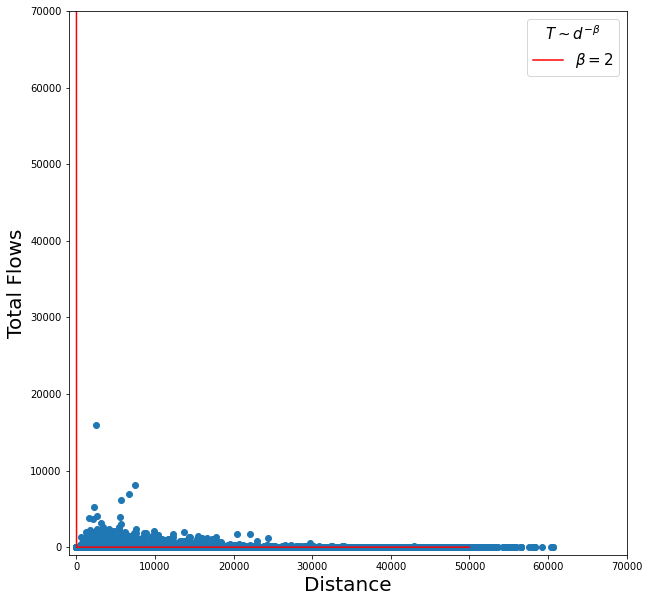

In [85]:
#first plot the Total commuter flows denoted by T against distance denoted by d
#and then fit a model line T ~ d^-beta with beta=2

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = cdata["distance"], y=cdata["flows"])
#line plot
line = np.arange(0.0002, 50_000, 0.1)
ax.plot(line, line**-6, color ="r", label = "$\\beta=2$")
#add a legend
ax.legend(title = "$T \\sim d^{-\\beta}$", fontsize = 15, title_fontsize=15)
#axis limits
ax.set_xlim([-1000,70000])
ax.set_ylim([-1000, 70000])
#set the labels
ax.set_xlabel("Distance", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

Text(0, 0.5, 'Total Flows')

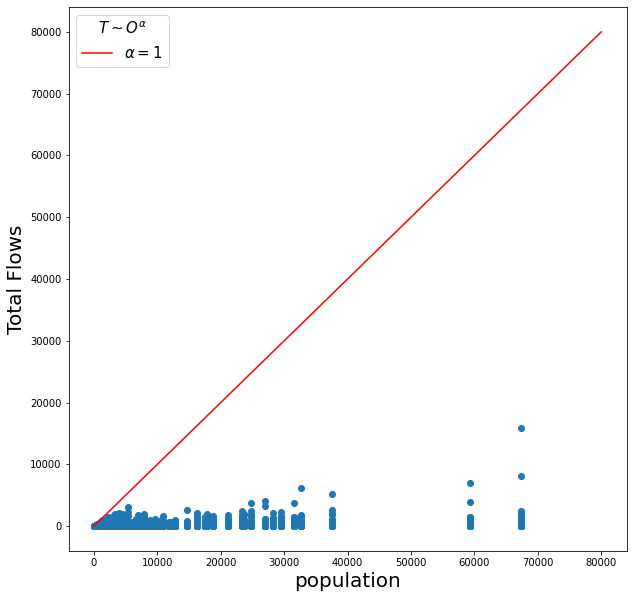

In [86]:
#Let us now look at the behaviour of the flows with respect to the population at the origin denoted by O
#and then fit a model line T ~ O^alpha, for alpha=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = cdata["population"], y=cdata["flows"])
#line plot
line = np.arange(0.0002, 80000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\alpha=1$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim O^{\\alpha}$", title_fontsize=15)
#axis labels
ax.set_xlabel("population", fontsize = 20)
ax.set_ylabel("Total Flows", fontsize = 20)

Text(0, 0.5, 'Total flows')

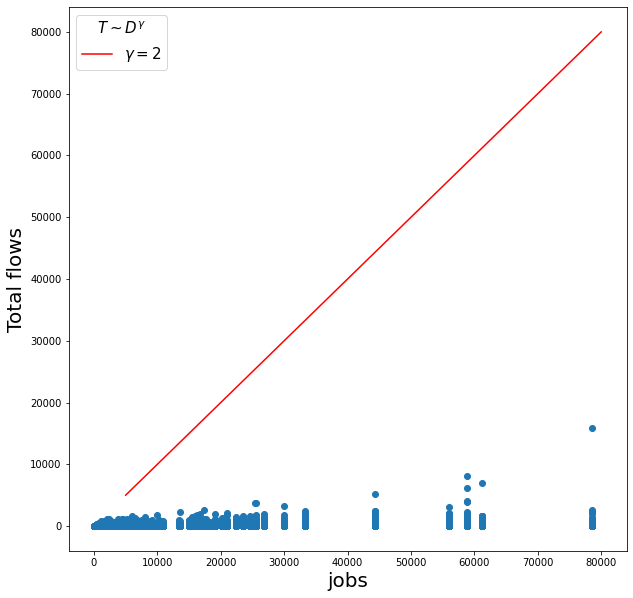

In [87]:
#Now let us look at the behaviour of the flows with respect to the salaries at destination denoted by D
# and then fit a model line  T ~ D^gamma. We will fit a line for gamma=1

#set the base axis
fig, ax = plt.subplots(figsize=(10,10))

#scatter plot
ax.scatter(x = cdata["jobs"], y=cdata["flows"])
#line plot
line = np.arange(5_000, 80000, 0.1)
ax.plot(line, line**1, color ="r", label = "$\\gamma=2$")
#add a legend
ax.legend( fontsize = 15, title = "$T \sim D^{\\gamma}$", title_fontsize=15)
#axis labels
ax.set_xlabel("jobs", fontsize = 20)
ax.set_ylabel("Total flows", fontsize = 20)

In [88]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(cdatasub["flows"])

In [89]:
Oi1_alpha = cdatasub["population"]**alpha
Dj2_gamma = cdatasub["jobs"]**gamma
dist_beta = cdatasub["distance"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)

In [90]:
#run the model and store of the new flow estimates in a new column
cdatasub["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
cdatasub["unconstrainedEst1"] = cdatasub["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub["unconstrainedEst1"])

22028

In [91]:
cdatasubmat1 = cdatasub.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat1

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,857.0,975.0,2531.0,1074.0,417.0,568.0,6422
Canary Wharf,568.0,NaN,83.0,68.0,102.0,391.0,47.0,1259
King's Cross St. Pancras,2206.0,283.0,NaN,885.0,2751.0,228.0,368.0,6721
Old Street,2274.0,92.0,352.0,NaN,123.0,68.0,47.0,2956
Oxford Circus,179.0,26.0,203.0,23.0,NaN,16.0,104.0,551
Stratford,1176.0,1664.0,284.0,212.0,275.0,NaN,110.0,3721
Westminster,149.0,19.0,43.0,14.0,163.0,10.0,NaN,398
All,6552.0,2941.0,1940.0,3733.0,4488.0,1130.0,1244.0,22028


In [92]:
cdatasubmat

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,2339.0,675.0,729.0,852.0,272.0,183.0,5050
Canary Wharf,2643.0,NaN,56.0,38.0,73.0,657.0,429.0,3896
King's Cross St. Pancras,1366.0,388.0,NaN,553.0,1260.0,108.0,317.0,3992
Old Street,546.0,122.0,325.0,NaN,167.0,38.0,50.0,1248
Oxford Circus,202.0,27.0,90.0,22.0,NaN,75.0,6.0,422
Stratford,1138.0,3875.0,161.0,126.0,1047.0,NaN,679.0,7026
Westminster,66.0,257.0,15.0,8.0,6.0,42.0,NaN,394
All,5961.0,7008.0,1322.0,1476.0,3405.0,1192.0,1664.0,22028


#### R-Squared

In [93]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(cdatasub["flows"], cdatasub["unconstrainedEst1"])

0.28746769499714825

#### Root Mean Squared Error (RMSE)

In [94]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

CalcRMSE(cdatasub["flows"], cdatasub["unconstrainedEst1"])

728.385

#### Improving our model: 1 -  calibrating parameters

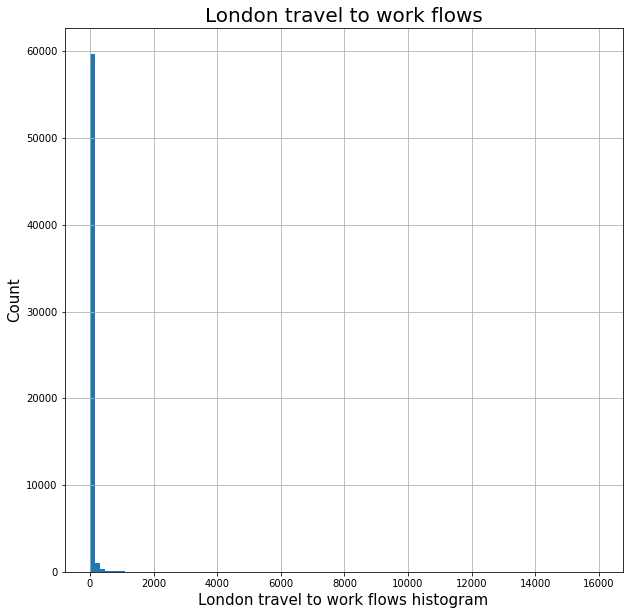

In [95]:
plt.subplots(figsize=(10,10))

plt.hist(cdata["flows"], histtype="stepfilled" , bins = 100)
plt.xlabel("London travel to work flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London travel to work flows", fontsize = 20)
plt.grid(True)

Text(0, 0.5, 'log(flows)')

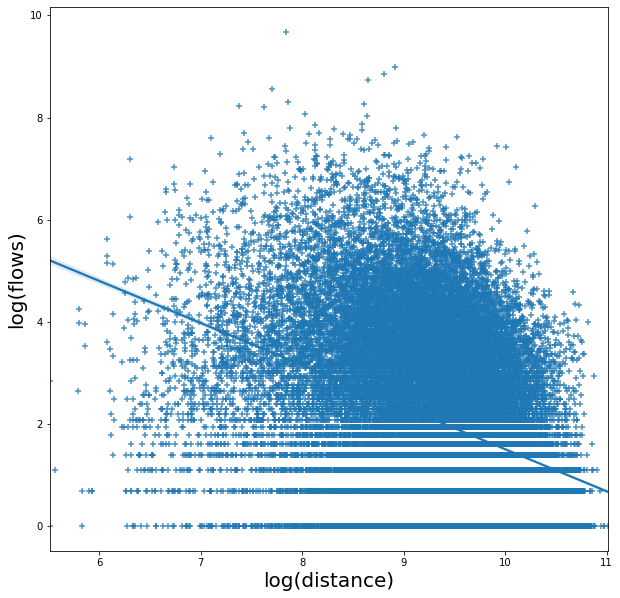

In [96]:
#subset the dataframe to the flows we want
cdata_flows = cdata[["flows", "distance"]]
#remove all 0 values (logarithms can't deal with 0 values)
cdata_flows = cdata_flows[(cdata_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(cdata_flows["distance"])
y = np.log(cdata_flows["flows"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(distance)", fontsize = 20)
ax.set_ylabel("log(flows)", fontsize = 20)

In [97]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub[f"log_{x}"] = np.log(cdatasub[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs +log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdatasub, 
                  family=sm.families.Poisson()).fit()

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [98]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdatasub["unconstrainedEst2"] = np.exp(K 
                                       + alpha*cdatasub["log_population"] 
                                       + gamma*cdatasub["log_jobs"] 
                                       - beta*cdatasub["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdatasub["fitted"] = predictions_summary_frame["mean"]

uncosim.mu

array([1161.61377939,  813.13907823,  713.44706379, 1042.80242693,
        824.03770247,  369.8903295 ,  834.8130437 ,  197.08436559,
        105.68299089,  264.78012467,  556.31327242,   88.87601096,
       2100.58341152,  708.43466042,  446.11404835, 1524.5754587 ,
        623.6783617 ,  300.77197129,  893.55699011,  184.17815839,
        216.28744125,  170.33224909,  155.87079686,   52.5828246 ,
        214.86127235,   75.91262709,  121.59898116,   28.0215716 ,
         60.33359562,   52.37844322, 2362.68436466, 2219.47662277,
        692.22009555,  356.83124792,  839.57930101,  264.45262217,
        144.56098779,   48.33204962,   45.50303806,   16.40822262,
         99.35154068,   36.04685527])

In [99]:
#round the numbers so that we don't get a half of a person
cdatasub["unconstrainedEst2"] = round(cdatasub["unconstrainedEst2"], 0)
#convert to integers
cdatasub["unconstrainedEst2"] = cdatasub["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub["unconstrainedEst2"])

22029

In [100]:
#turn it into a little matrix and have a look at your handy work
cdatasubmat2 = cdatasub.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat2

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,1162.0,813.0,713.0,1043.0,824.0,370.0,4925
Canary Wharf,835.0,NaN,197.0,106.0,265.0,556.0,89.0,2048
King's Cross St. Pancras,2101.0,708.0,NaN,446.0,1525.0,624.0,301.0,5705
Old Street,894.0,184.0,216.0,NaN,170.0,156.0,53.0,1673
Oxford Circus,215.0,76.0,122.0,28.0,NaN,60.0,52.0,553
Stratford,2363.0,2219.0,692.0,357.0,840.0,NaN,264.0,6735
Westminster,145.0,48.0,46.0,16.0,99.0,36.0,NaN,390
All,6553.0,4397.0,2086.0,1666.0,3942.0,2256.0,1129.0,22029


In [101]:
#compare it to the actual flows
cdatasubmat 

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,2339.0,675.0,729.0,852.0,272.0,183.0,5050
Canary Wharf,2643.0,NaN,56.0,38.0,73.0,657.0,429.0,3896
King's Cross St. Pancras,1366.0,388.0,NaN,553.0,1260.0,108.0,317.0,3992
Old Street,546.0,122.0,325.0,NaN,167.0,38.0,50.0,1248
Oxford Circus,202.0,27.0,90.0,22.0,NaN,75.0,6.0,422
Stratford,1138.0,3875.0,161.0,126.0,1047.0,NaN,679.0,7026
Westminster,66.0,257.0,15.0,8.0,6.0,42.0,NaN,394
All,5961.0,7008.0,1322.0,1476.0,3405.0,1192.0,1664.0,22028


In [102]:
CalcRSqaured(cdatasub["flows"], cdatasub["unconstrainedEst2"])

0.5654865489046319

In [103]:
CalcRMSE(cdatasub["flows"], cdatasub["unconstrainedEst2"])

517.258

### IV. Scenarios

#### IV.1. 
Scenario A: assume that Canary Wharf has a 50% decrease in jobs after Brexit. Using the calibrated parameter beta, compute the new flows for scenario A. Make sure the number of commuters is conserved.

In [104]:
def new_jobs(row):
    if row["station_destination"] == "Canary Wharf":
        val = 58772/2
    else:
        val = row["jobs"]
    return val
        
cdatasub["jobs_reduce"] = cdatasub.apply(new_jobs, axis =1)
cdatasub["jobs_reduce"] = cdatasub["jobs_reduce"].astype(int)
cdatasub.head(10)

,station_origin,station_destination,TotalNoIntra,flows,population,jobs,distance,offset,unconstrainedEst1,log_population,log_jobs,log_distance,unconstrainedEst2,fitted,jobs_reduce
2596,Bank and Monument,Canary Wharf,2339,2339,29494,58772,5387.422428,0.0,857,10.291942,10.981421,8.591822,1162,1161.613779,29386
2699,Bank and Monument,King's Cross St. Pancras,675,675,29494,33330,3803.026209,0.0,975,10.291942,10.414213,8.243552,813,813.139078,33330
2742,Bank and Monument,Old Street,729,729,29494,15897,1630.349180,0.0,2531,10.291942,9.673886,7.396549,713,713.447064,15897
2745,Bank and Monument,Oxford Circus,852,852,29494,44368,4181.523713,0.0,1074,10.291942,10.700274,8.338431,1043,1042.802427,44368
2803,Bank and Monument,Stratford,272,272,29494,55954,7539.963954,0.0,417,10.291942,10.932285,8.927973,824,824.037702,55954
2848,Bank and Monument,Westminster,183,183,29494,15466,3393.314470,0.0,568,10.291942,9.646399,8.129562,370,369.890330,15466
8818,Canary Wharf,Bank and Monument,2643,2643,14632,78549,5387.422428,0.0,568,9.590966,11.271478,8.591822,835,834.813044,78549
8950,Canary Wharf,King's Cross St. Pancras,56,56,14632,33330,9190.448637,0.0,83,9.590966,10.414213,9.125920,197,197.084366,33330
8993,Canary Wharf,Old Street,38,38,14632,15897,7017.771608,0.0,68,9.590966,9.673886,8.856201,106,105.682991,15897
8996,Canary Wharf,Oxford Circus,73,73,14632,44368,9568.946141,0.0,102,9.590966,10.700274,9.166278,265,264.780125,44368


In [105]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs_reduce", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub[f"log_{x}"] = np.log(cdatasub[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs_reduce +log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdatasub, 
                  family=sm.families.Poisson()).fit()

In [106]:
#first assign the parameter values from the model to the appropriate variables


K= -8.0291
alpha=0.9482
gamma=1.1525
beta=0.8529

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdatasub["unconstrained_job_reduce_Est"] = np.exp(K 
                                       + alpha*cdatasub["log_population"] 
                                       + gamma*cdatasub["log_jobs_reduce"] 
                                       - beta*cdatasub["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdatasub["fitted"] = predictions_summary_frame["mean"]

In [107]:
#round the numbers so that we don't get a half of a person
cdatasub["unconstrained_job_reduce_Est"] = round(cdatasub["unconstrained_job_reduce_Est"], 0)
#convert to integers
cdatasub["uunconstrained_job_reduce_Est"] = cdatasub["unconstrained_job_reduce_Est"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub["unconstrained_job_reduce_Est"])

19614.0

In [108]:
#turn it into a little matrix and have a look at your handy work
cdatasubmat3 = cdatasub.pivot_table(values ="unconstrained_job_reduce_Est", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat3

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,523.0,813.0,714.0,1043.0,824.0,370.0,4287.0
Canary Wharf,835.0,NaN,197.0,106.0,265.0,556.0,89.0,2048.0
King's Cross St. Pancras,2101.0,319.0,NaN,446.0,1525.0,624.0,301.0,5316.0
Old Street,894.0,83.0,216.0,NaN,170.0,156.0,53.0,1572.0
Oxford Circus,215.0,34.0,122.0,28.0,NaN,60.0,52.0,511.0
Stratford,2363.0,999.0,692.0,357.0,840.0,NaN,265.0,5516.0
Westminster,145.0,22.0,46.0,16.0,99.0,36.0,NaN,364.0
All,6553.0,1980.0,2086.0,1667.0,3942.0,2256.0,1130.0,19614.0


In [109]:
#compare it to the actual flows
cdatasubmat 

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,2339.0,675.0,729.0,852.0,272.0,183.0,5050
Canary Wharf,2643.0,NaN,56.0,38.0,73.0,657.0,429.0,3896
King's Cross St. Pancras,1366.0,388.0,NaN,553.0,1260.0,108.0,317.0,3992
Old Street,546.0,122.0,325.0,NaN,167.0,38.0,50.0,1248
Oxford Circus,202.0,27.0,90.0,22.0,NaN,75.0,6.0,422
Stratford,1138.0,3875.0,161.0,126.0,1047.0,NaN,679.0,7026
Westminster,66.0,257.0,15.0,8.0,6.0,42.0,NaN,394
All,5961.0,7008.0,1322.0,1476.0,3405.0,1192.0,1664.0,22028


In [110]:
CalcRSqaured(cdatasub["flows"], cdatasub["unconstrained_job_reduce_Est"])

0.3024924032875866

In [111]:
CalcRMSE(cdatasub["flows"], cdatasub["unconstrained_job_reduce_Est"])

665.248

#### IV.2. 
Scenario B: assume that there is a significant increase in the cost of transport. Select 2 values for the parameter in the cost function reflecting scenario B. Recompute the distribution of flows.

#### (1) beta=0.9

In [112]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub[f"log_{x}"] = np.log(cdatasub[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs +log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdatasub, 
                  family=sm.families.Poisson()).fit()

In [113]:
K= -8.0291
alpha=0.9482
gamma=1.1525
beta=0.9

In [114]:
#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdatasub["unconstrained_increase_cost"] = np.exp(K 
                                       + alpha*cdatasub["log_population"] 
                                       + gamma*cdatasub["log_jobs"] 
                                       - beta*cdatasub["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdatasub["fitted"] = predictions_summary_frame["mean"]

In [115]:
#round the numbers so that we don't get a half of a person
cdatasub["unconstrained_increase_cost"] = round(cdatasub["unconstrained_increase_cost"], 0)
#convert to integers
cdatasub["unconstrained_increase_cost"] = cdatasub["unconstrained_increase_cost"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub["unconstrained_increase_cost"])

14754

In [116]:
#turn it into a little matrix and have a look at your handy work
cdatasubmat4 = cdatasub.pivot_table(values ="unconstrained_increase_cost", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat4

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,775.0,552.0,504.0,704.0,541.0,252.0,3328
Canary Wharf,557.0,NaN,128.0,70.0,172.0,371.0,58.0,1356
King's Cross St. Pancras,1425.0,461.0,NaN,308.0,1054.0,404.0,203.0,3855
Old Street,631.0,121.0,149.0,NaN,114.0,102.0,35.0,1152
Oxford Circus,145.0,49.0,84.0,19.0,NaN,39.0,36.0,372
Stratford,1552.0,1480.0,449.0,234.0,540.0,NaN,171.0,4426
Westminster,99.0,32.0,31.0,11.0,69.0,23.0,NaN,265
All,4409.0,2918.0,1393.0,1146.0,2653.0,1480.0,755.0,14754


In [117]:
#compare it to the actual flows
cdatasubmat 

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,2339.0,675.0,729.0,852.0,272.0,183.0,5050
Canary Wharf,2643.0,NaN,56.0,38.0,73.0,657.0,429.0,3896
King's Cross St. Pancras,1366.0,388.0,NaN,553.0,1260.0,108.0,317.0,3992
Old Street,546.0,122.0,325.0,NaN,167.0,38.0,50.0,1248
Oxford Circus,202.0,27.0,90.0,22.0,NaN,75.0,6.0,422
Stratford,1138.0,3875.0,161.0,126.0,1047.0,NaN,679.0,7026
Westminster,66.0,257.0,15.0,8.0,6.0,42.0,NaN,394
All,5961.0,7008.0,1322.0,1476.0,3405.0,1192.0,1664.0,22028


In [118]:
CalcRSqaured(cdatasub["flows"], cdatasub["unconstrained_increase_cost"])

0.5656407640326113

In [119]:
CalcRMSE(cdatasub["flows"], cdatasub["unconstrained_increase_cost"])

578.058

#### (2) beta=1.1

In [120]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub[f"log_{x}"] = np.log(cdatasub[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs +log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdatasub, 
                  family=sm.families.Poisson()).fit()

In [121]:
K= -8.0291
alpha=0.9482
gamma=1.1525
beta=1.1

In [122]:
#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdatasub["unconstrained_increase_cost"] = np.exp(K 
                                       + alpha*cdatasub["log_population"] 
                                       + gamma*cdatasub["log_jobs"] 
                                       - beta*cdatasub["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdatasub["fitted"] = predictions_summary_frame["mean"]

In [123]:
#round the numbers so that we don't get a half of a person
cdatasub["unconstrained_increase_cost"] = round(cdatasub["unconstrained_increase_cost"], 0)
#convert to integers
cdatasub["unconstrained_increase_cost"] = cdatasub["unconstrained_increase_cost"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub["unconstrained_increase_cost"])

2707

In [124]:
#turn it into a little matrix and have a look at your handy work
cdatasubmat5 = cdatasub.pivot_table(values ="unconstrained_increase_cost", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat5

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,139.0,106.0,115.0,133.0,91.0,50.0,634
Canary Wharf,100.0,NaN,21.0,12.0,28.0,66.0,10.0,237
King's Cross St. Pancras,274.0,74.0,NaN,63.0,219.0,64.0,38.0,732
Old Street,144.0,21.0,31.0,NaN,21.0,17.0,6.0,240
Oxford Circus,27.0,8.0,17.0,3.0,NaN,6.0,8.0,69
Stratford,260.0,265.0,71.0,39.0,83.0,NaN,27.0,745
Westminster,19.0,5.0,6.0,2.0,14.0,4.0,NaN,50
All,824.0,512.0,252.0,234.0,498.0,248.0,139.0,2707


In [125]:
#compare it to the actual flows
cdatasubmat 

station_destination,Bank and Monument,Canary Wharf,King's Cross St. Pancras,Old Street,Oxford Circus,Stratford,Westminster,All
station_origin,,,,,,,,
Bank and Monument,NaN,2339.0,675.0,729.0,852.0,272.0,183.0,5050
Canary Wharf,2643.0,NaN,56.0,38.0,73.0,657.0,429.0,3896
King's Cross St. Pancras,1366.0,388.0,NaN,553.0,1260.0,108.0,317.0,3992
Old Street,546.0,122.0,325.0,NaN,167.0,38.0,50.0,1248
Oxford Circus,202.0,27.0,90.0,22.0,NaN,75.0,6.0,422
Stratford,1138.0,3875.0,161.0,126.0,1047.0,NaN,679.0,7026
Westminster,66.0,257.0,15.0,8.0,6.0,42.0,NaN,394
All,5961.0,7008.0,1322.0,1476.0,3405.0,1192.0,1664.0,22028


In [126]:
CalcRSqaured(cdatasub["flows"], cdatasub["unconstrained_increase_cost"])

0.5529440531520704

In [127]:
CalcRMSE(cdatasub["flows"], cdatasub["unconstrained_increase_cost"])

864.129

In [128]:
#export and save the results
cdatasub.to_csv("data/cdatasub1.csv")